C:\Users\50250\AppData\Local\Temp\ipykernel_67440\1754071233.py:12: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_modelo.csv')


Departamento de Registro                  0
Municipio de Registro                     0
Mes de Registro                           0
Ano de Registro                           0
Ano Ocurrencia                       160246
Clase de Union                        13845
Numero de Nupcias del Hombre         618343
Numero de Nupcias de la Mujer        618244
Edad del Hombre                         127
Edad de la Mujer                          0
Pueblo de Pertenencia del Hombre      56270
Pueblo de Pertenencia de la Mujer     79040
Nacionalidad del Hombre                   8
Nacionalidad de la Mujer                  6
Escolaridad del Hombre                33385
Escolaridad de la Mujer               54994
Ocupacion del Hombre                  46306
Ocupacion de la Mujer                138855
Departamento de Ocurrencia                0
Municipio de Ocurrencia                  15
Dia de la Ocurrencia                      0
Mes de la Ocurrencia                      0
Area Geografica de la Ocurrencia

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[156289      9]
 [ 10151      0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    156298
           1       0.00      0.00      0.00     10151

    accuracy                           0.94    166449
   macro avg       0.47      0.50      0.48    166449
weighted avg       0.88      0.94      0.91    166449


Precisión del modelo:
0.9389602821284597


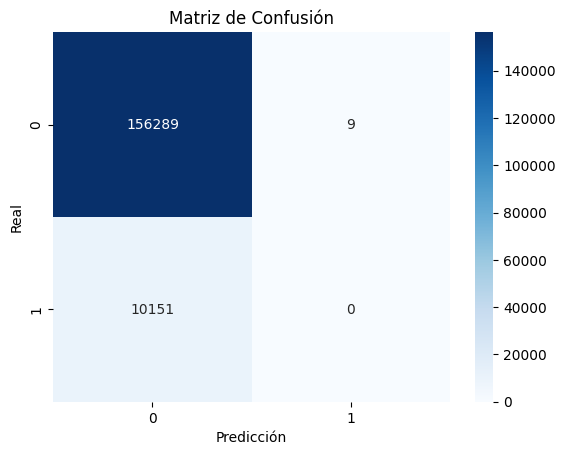

In [1]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Cargar el dataset
# Asegúrate de reemplazar 'matrimonios.csv' con el nombre correcto del archivo
df = pd.read_csv('dataset_modelo.csv')

ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)

import re

def es_municipio_valido(valor):
    # Convertir a string por si hay valores numéricos
    val = str(valor)
    
    # Detectar fechas tipo '1/mes/2025'
    if re.match(r'^1\/(1[0-2]|[1-9])\/2025$', val):
        return False
    
    # Detectar códigos tipo '06-1', '13-1', etc.
    if re.match(r'^\d{1,2}-\d+$', val):
        return False

    # Aquí podrías agregar más condiciones si encuentras más patrones inválidos

    return True

df['Municipio de Ocurrencia'] = df['Municipio de Ocurrencia'].apply(lambda x: x if es_municipio_valido(x) else np.nan)
df['Municipio de Registro'] = df['Municipio de Registro'].apply(lambda x: x if es_municipio_valido(x) else np.nan)
# Ver las primeras filas
df.head()

# Paso 3: Verificar si hay valores nulos
print(df.isnull().sum())

# Paso 4: Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop('divorcio', axis=1)
y = df['divorcio']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# Paso 5: Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputado, y, test_size=0.2, random_state=42)

# Paso 6: Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=5000)
modelo.fit(X_train, y_train)

# Paso 7: Hacer predicciones y evaluar
y_pred = modelo.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

# Paso 8 (opcional): Visualizar la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## Modelo KNN

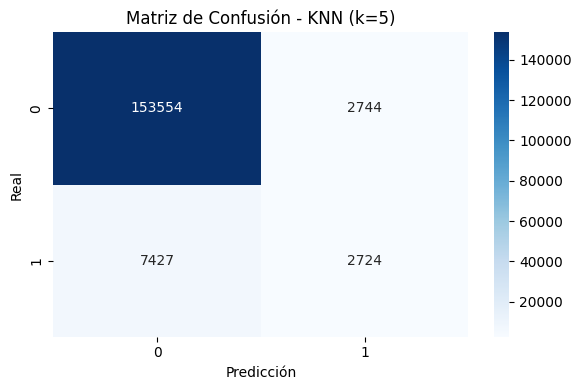

(array([[153554,   2744],
        [  7427,   2724]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97    156298\n           1       0.50      0.27      0.35     10151\n\n    accuracy                           0.94    166449\n   macro avg       0.73      0.63      0.66    166449\nweighted avg       0.93      0.94      0.93    166449\n',
 0.9388941958197405)

In [7]:
# Definir y entrenar el pipeline de KNN sin búsqueda de hiperparámetros
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluación
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN (k=5)')
plt.tight_layout()
plt.show()

conf_matrix_knn, class_report_knn, accuracy_knn


In [9]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_knn))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred_knn))

Matriz de confusión:
[[153554   2744]
 [  7427   2724]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    156298
           1       0.50      0.27      0.35     10151

    accuracy                           0.94    166449
   macro avg       0.73      0.63      0.66    166449
weighted avg       0.93      0.94      0.93    166449


Precisión del modelo:
0.9388941958197405
